In [80]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


### Which Factors Influence the Price of Health Insurance?
Many factors that affect how much you pay for health insurance are not within your control. Nonetheless, it's good to have an understanding of what they are. Here are some factors that affect how much health insurance premiums cost
age: age of primary beneficiary
sex: insurance contractor gender, female, male
bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
children: Number of children covered by health insurance / Number of dependents
smoker: Smoking
region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest

# import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv("insurance.csv")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [6]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [7]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [8]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [9]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [10]:
df.shape

(1338, 7)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [13]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [14]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [15]:
df['sex']= label_encoder.fit_transform(df['sex'])
df['smoker']= label_encoder.fit_transform(df['smoker'])


# EDA and Visualizations

<Axes: >

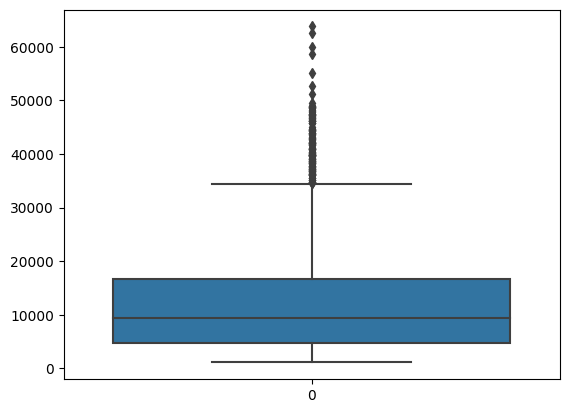

In [16]:
sns.boxplot(df['charges'])

Text(0.5, 1.0, 'The number of smokers and non-smokers (18 years old)')

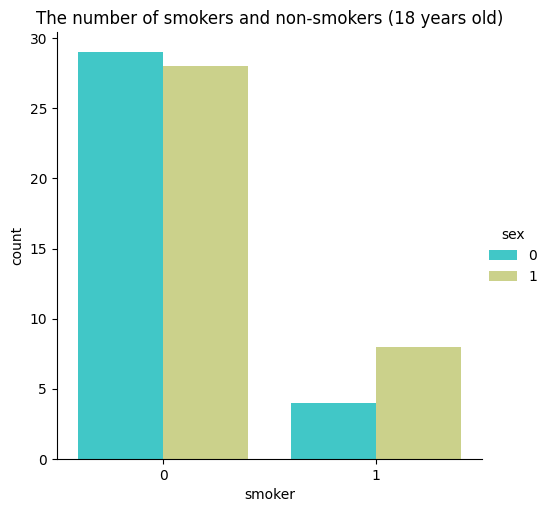

In [17]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="rainbow", data=df[(df.age == 18)])
plt.title("The number of smokers and non-smokers (18 years old)")


### Oh. I was hoping the result would be different. 18 years old - a very young age. Does smoking affect the cost of treatment at this age?

<Axes: title={'center': 'Box plot for charges 18 years old smokers'}, xlabel='charges', ylabel='smoker'>

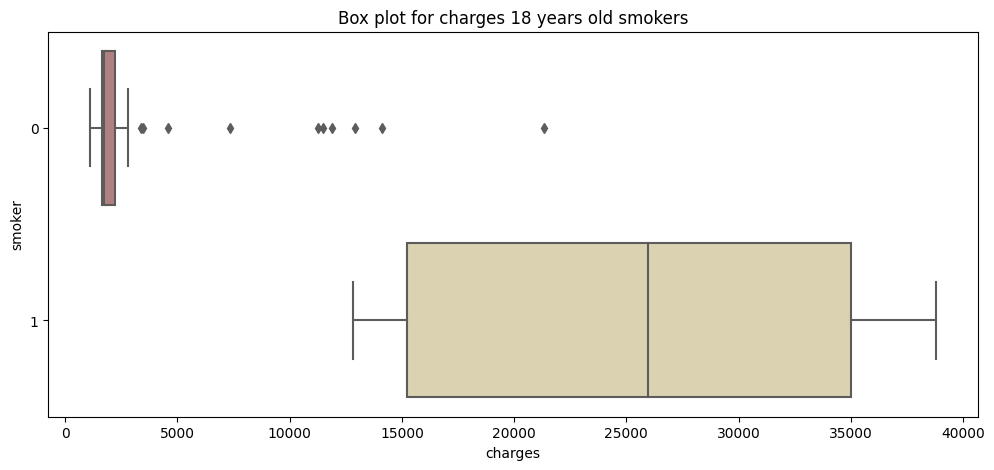

In [18]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges 18 years old smokers")
sns.boxplot(y="smoker", x="charges", data = df[(df.age == 18)] , orient="h", palette = 'pink')

### Oh. As we can see, even at the age of 18 smokers spend much more on treatment than non-smokers. Among non-smokers we are seeing some " tails." I can assume that this is due to serious diseases or accidents. Now let's see how the cost of treatment depends on the age of smokers and non-smokers patients.

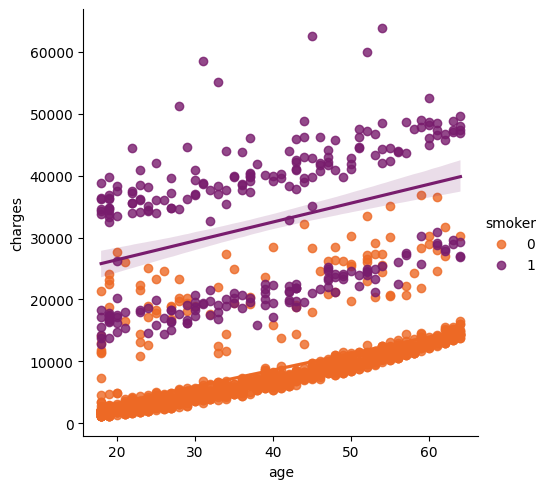

In [19]:
sns.lmplot(x="age", y="charges", hue="smoker", data=df, palette = 'inferno_r')


### In non-smokers, the cost of treatment increases with age. That makes sense. So take care of your health, friends! In smoking people, we do not see such dependence. I think that it is not only in smoking but also in the peculiarities of the dataset. Such a strong effect of Smoking on the cost of treatment would be more logical to judge having a set of data with a large number of records and signs. But we work with what we have! Let's pay attention to bmi. I am surprised that this figure but affects the cost of treatment in patients. Or are we on a diet for nothing?

<Axes: xlabel='charges', ylabel='Count'>

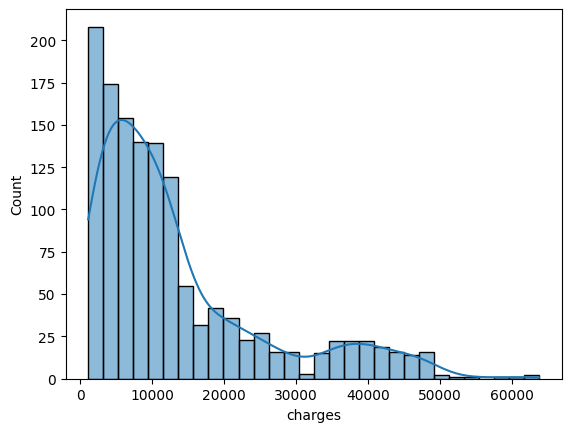

In [20]:
sns.histplot(data=df,x='charges',kde=True)

<ipython-input-21-1557a48404fa>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['charges'], kde = True, color = 'c')


Text(0.5, 1.0, 'Distribution of Charges')

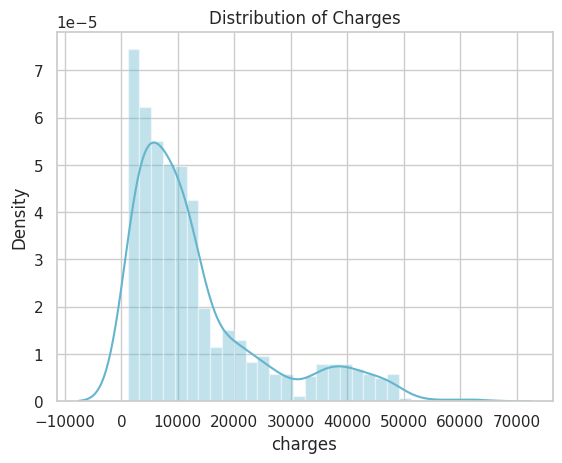

In [21]:
sns.set(style='whitegrid')
ax = sns.distplot(df['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')

##### This distribution is right-skewed. To make it closer to normal we can apply natural log


<ipython-input-22-0f785cae80c9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'r' )


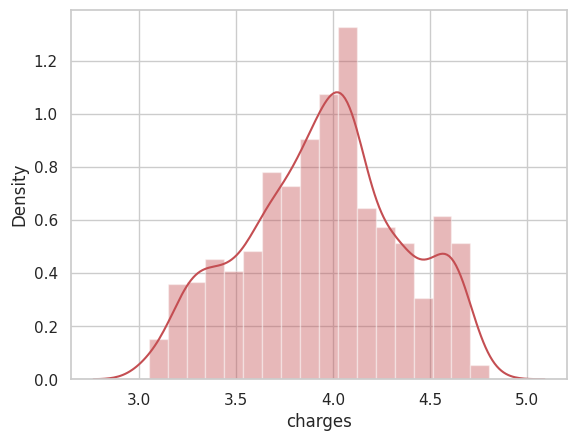

In [22]:
ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'r' )

##### Now let's look at the charges by region


In [23]:
charges = df['charges'].groupby(df['region']).sum().sort_values(ascending = True)
charges = charges.head()

In [24]:
charges

region
southwest    4.012755e+06
northwest    4.035712e+06
northeast    4.343669e+06
southeast    5.363690e+06
Name: charges, dtype: float64

<Axes: xlabel='region', ylabel='charges'>

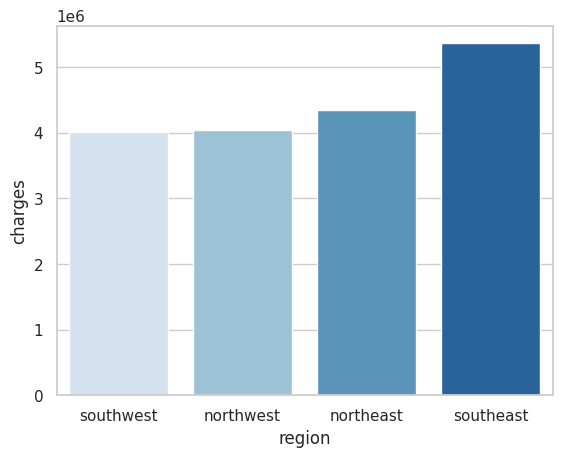

In [25]:
sns.barplot(x=charges.index, y=charges, palette='Blues')

##### So overall the highest medical charges are in the Southeast and the lowest are in the Southwest. Taking into account certain factors (sex, smoking, having children) let's see how it changes by region


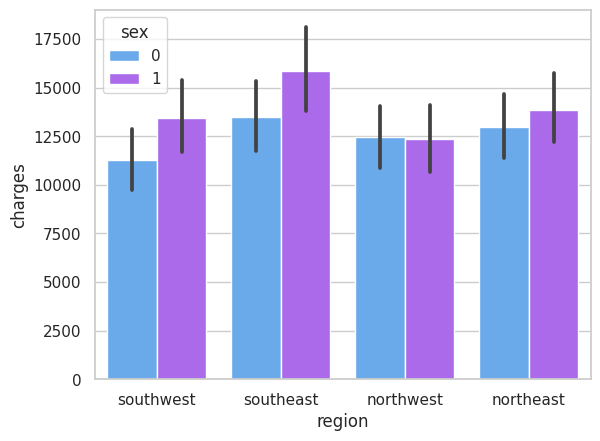

In [ ]:
ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool')

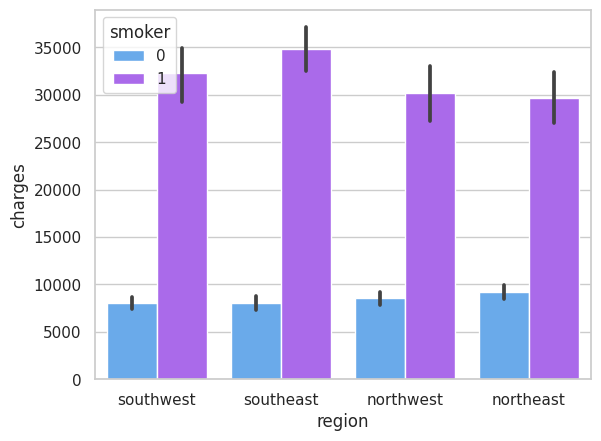

In [ ]:
ax = sns.barplot(x='region', y='charges', hue='smoker', data=df, palette='cool')

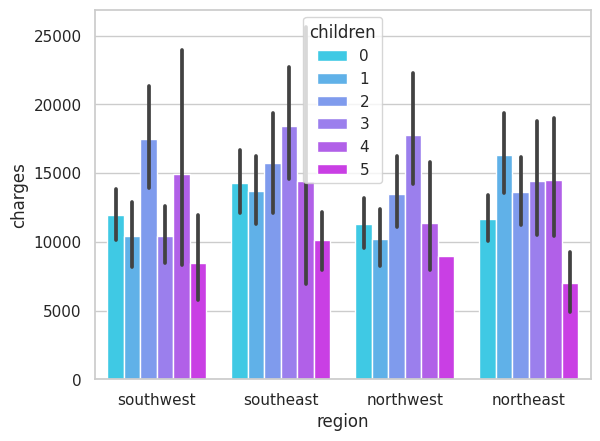

In [ ]:
ax = sns.barplot(x='region', y='charges', hue='children', data=df, palette='cool')


In [26]:
df['region']= label_encoder.fit_transform(df['region'])

In [27]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


<Axes: >

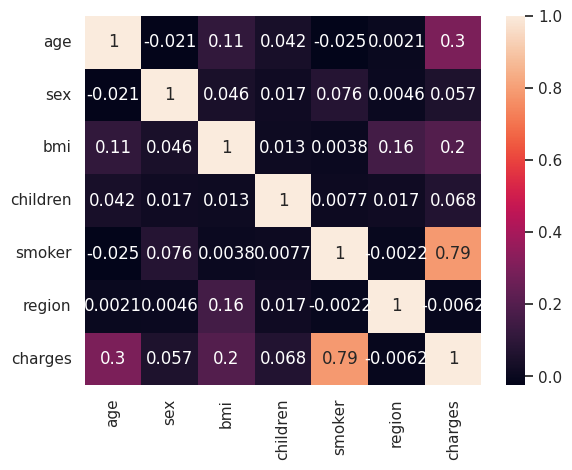

In [28]:
sns.heatmap(df.corr(),annot=True)

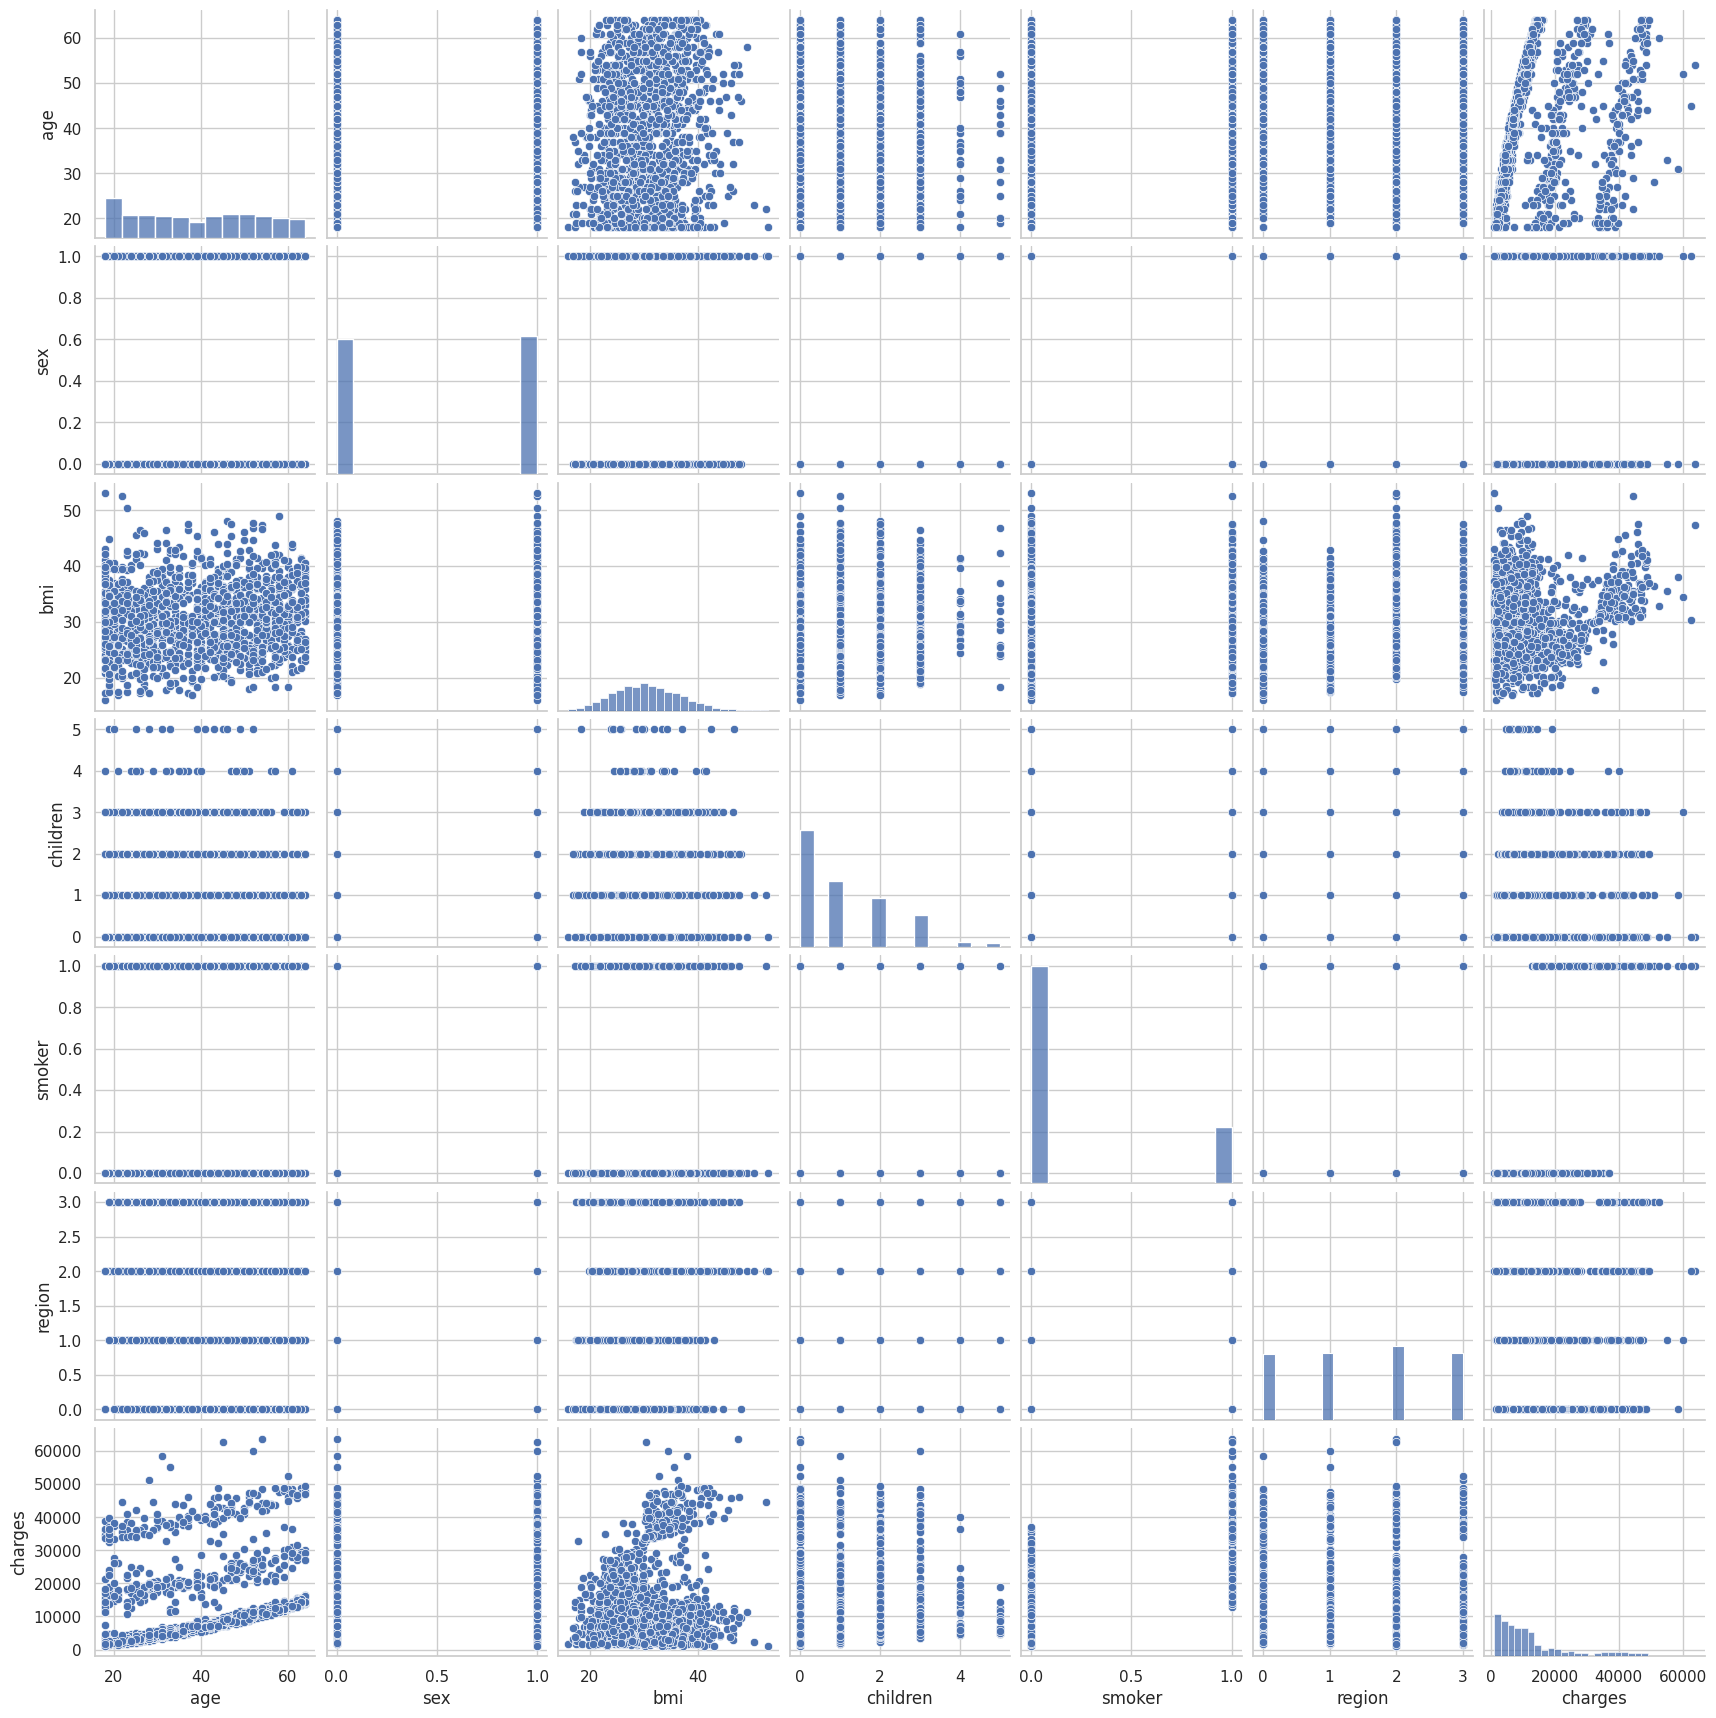

In [ ]:
sns.pairplot(df)

# Compare Between Models

In [29]:
from sklearn.model_selection import train_test_split
x = df.drop(['charges'], axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


models = {
    "LR": LinearRegression(),
    "RF": RandomForestRegressor(n_estimators=100, max_depth=7),
    "DT": DecisionTreeRegressor(),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, max_depth=7),
    "KNN": KNeighborsRegressor(),
    "SVR": SVR()
}

for name, model in models.items():
    print(f'Training Model {name} \n-----------------------------------------------')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Score is {model.score(x_test, y_test)}')


    # Use appropriate regression metrics
    print(f'Training R-squared: {r2_score(y_train, model.predict(x_train))}')
    print(f'Testing R-squared: {r2_score(y_test, y_pred)}')

    print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
    print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')




Training Model LR 
-----------------------------------------------
Score is 0.7833463107364539
Training R-squared: 0.7417049283233981
Testing R-squared: 0.7833463107364539
Mean Squared Error: 33635210.431178406
Mean Absolute Error: 4186.508898366433
Training Model RF 
-----------------------------------------------
Score is 0.8738643898702836
Training R-squared: 0.9265647191400956
Testing R-squared: 0.8738643898702836
Mean Squared Error: 19582393.468579363
Mean Absolute Error: 2439.2979017008743
Training Model DT 
-----------------------------------------------
Score is 0.7208205295854403
Training R-squared: 0.9983078124756305
Testing R-squared: 0.7208205295854403
Mean Squared Error: 43342258.6404055
Mean Absolute Error: 3029.7321521231347
Training Model GradientBoosting 
-----------------------------------------------
Score is 0.8411628340854267
Training R-squared: 0.9927812965590004
Testing R-squared: 0.8411628340854267
Mean Squared Error: 24659268.52198586
Mean Absolute Error: 2604.

### The best is RandomForestRegressor

# Now We Go To Choose Max Depth

In [31]:
max_depth_values = [1,2,3,4,5,6,7,8]
train_accuracy_values =[]
for max_depth_val in max_depth_values:
    model = RandomForestRegressor(max_depth=max_depth_val,random_state = 2)
    model.fit(x_train, y_train)
    y_pred =model.predict(x_train)
    acc_train=model.score(x_test,y_test)
    train_accuracy_values.append(acc_train)

In [32]:
train_accuracy_values

[0.6608048922770777,
 0.8417933495550463,
 0.8675746825596274,
 0.872677170478934,
 0.8753239247794342,
 0.8755309603734038,
 0.8729311378096285,
 0.8711685231482463]

In [33]:
final_model = RandomForestRegressor(max_depth=6,random_state = 0)
final_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=6, random_state=0)

In [58]:
import pickle
# Step 2: Save the trained model to a pickle file
with open('your_model.pkl', 'wb') as model_file:
    pickle.dump(final_model, model_file)

In [59]:
# Now, let's load the model and make predictions on new data
# Load the model from the pickle file
with open('your_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Assuming x_new is your new data for prediction (based on x_train.head(1))
x_new = pd.DataFrame({'age': [46], 'sex': [0], 'bmi': [19.95], 'children': [2], 'smoker': [0], 'region': [1]})

# Make predictions
predictions = loaded_model.predict(x_new)

print("Predictions:", predictions)

Predictions: [9508.58804761]


In [61]:
x_train,y_train

(      age  sex     bmi  children  smoker  region
 560    46    0  19.950         2       0       1
 1285   47    0  24.320         0       0       0
 1142   52    0  24.860         0       0       2
 969    39    0  34.320         5       0       2
 486    54    0  21.470         3       0       1
 ...   ...  ...     ...       ...     ...     ...
 1095   18    0  31.350         4       0       0
 1130   39    0  23.870         5       0       2
 1294   58    1  25.175         0       0       0
 860    37    0  47.600         2       1       3
 1126   55    1  29.900         0       0       3
 
 [1070 rows x 6 columns],
 560      9193.83850
 1285     8534.67180
 1142    27117.99378
 969      8596.82780
 486     12475.35130
            ...     
 1095     4561.18850
 1130     8582.30230
 1294    11931.12525
 860     46113.51100
 1126    10214.63600
 Name: charges, Length: 1070, dtype: float64)

# Model Evalulation

In [34]:
forest_train_pred = final_model.predict(x_train)
forest_test_pred = final_model.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))

MSE train data: 13740918.931, MSE test data: 19845744.977
R2 train data: 0.905, R2 test data: 0.872


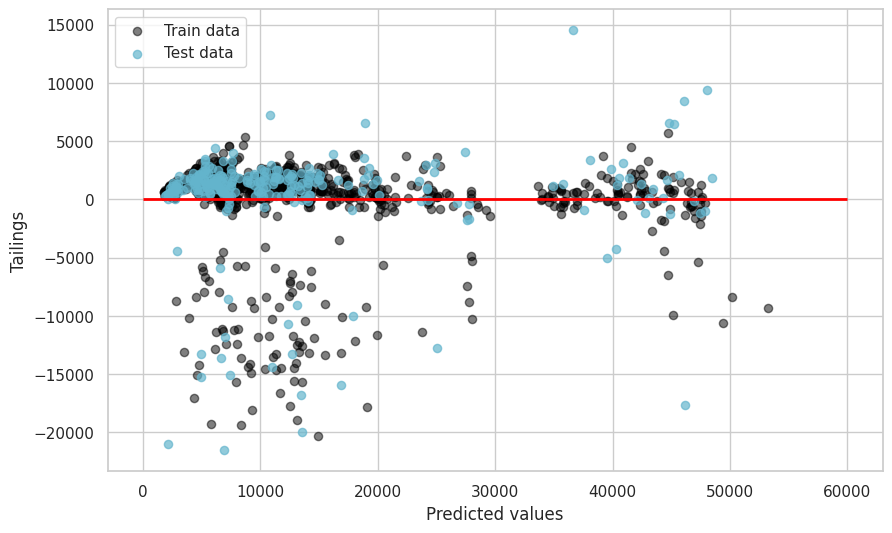

In [35]:
plt.figure(figsize=(10,6))

plt.scatter(forest_train_pred,forest_train_pred - y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(forest_test_pred,forest_test_pred - y_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
plt.show()

# Try LinearRegression & PolynomialFeatures

In [36]:
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lr.score(x_test,y_test))

0.7833463107364539


In [37]:
from sklearn.preprocessing import PolynomialFeatures


X = df.drop(['charges','region'], axis = 1)
Y = df.charges



quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,Y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print(plr.score(X_test,Y_test))

0.8849197344147227


In [86]:
X_test

array([[ 1., 52.,  1., ...,  1.,  0.,  0.],
       [ 1., 47.,  0., ...,  1.,  0.,  0.],
       [ 1., 48.,  1., ...,  4.,  2.,  1.],
       ...,
       [ 1., 51.,  1., ...,  1.,  0.,  0.],
       [ 1., 23.,  1., ...,  9.,  0.,  0.],
       [ 1., 61.,  0., ...,  0.,  0.,  1.]])

In [82]:
X_train[0]

array([1.000000e+00, 3.200000e+01, 0.000000e+00, 2.959000e+01,
       1.000000e+00, 0.000000e+00, 1.024000e+03, 0.000000e+00,
       9.468800e+02, 3.200000e+01, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 8.755681e+02,
       2.959000e+01, 0.000000e+00, 1.000000e+00, 0.000000e+00,
       0.000000e+00])

In [40]:
df.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.9,0,1,3,16884.924


In [48]:
#gg = [19,0,27.9,0,1]

# THANK YOU

In [52]:
import numpy as np
import pickle

gg = np.array([19, 0, 27.9, 0, 1]).reshape(1, -1)  # Convert the list to a NumPy array

# Load the model from the pickle file
with open('your_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Check the number of features in gg
num_features_gg = gg.shape[1]

# If the number of features is less than 21, you may need to adjust the data
if num_features_gg < 21:
    # Add missing features with appropriate values
    # For example, if you want to add zeros for missing features:
    missing_features = 21 - num_features_gg
    gg = np.concatenate((gg, np.zeros((gg.shape[0], missing_features))), axis=1)

# Now, you can make predictions
predictions = loaded_model.predict(gg)

print("Predictions:", predictions)


Predictions: [-14665.30061623]


In [62]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 7.0.0
    Uninstalling importlib-metadata-7.0.0:
      Successfully uninstalled importlib-metadata-7.0.0


In [63]:
import urllib
print("Password/Enpoint IP for localtunnel is:",urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))

Password/Enpoint IP for localtunnel is: 35.237.125.55


In [79]:
!streamlit run insure.py & npx localtunnel --port 8501

[..................] / rollbackFailedOptional: verb npm-session f1ef5fb8b6697f3


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.237.125.55:8501

npx: installed 22 in 3.086s
your url is: https://late-worlds-care.loca.lt
  Stopping...
^C
